In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
pd.read_csv('final_cleaned_gurgaon_property.csv').head()

,Unnamed: 0,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
0,0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,NaN,900.0,0,0,0,0,0,1,28
1,1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,0,37
2,2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,not available,New Property,NaN,NaN,595.0,0,0,0,0,0,1,36
3,3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,2.0,not available,Undefined,NaN,NaN,1200.0,0,0,0,0,0,1,76
4,4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,5.0,not available,Under Construction,1345.0,NaN,NaN,0,0,0,0,0,1,0


In [151]:
df = pd.read_csv('final_cleaned_gurgaon_property.csv').drop('Unnamed: 0', axis=1)

In [152]:
df.head()

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,NaN,900.0,0,0,0,0,0,1,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,0,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,not available,New Property,NaN,NaN,595.0,0,0,0,0,0,1,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,2.0,not available,Undefined,NaN,NaN,1200.0,0,0,0,0,0,1,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,5.0,not available,Under Construction,1345.0,NaN,NaN,0,0,0,0,0,1,0


In [153]:
df.drop_duplicates(inplace=True)

In [154]:
print(df.duplicated().sum())

0


In [155]:
df.shape

(3677, 23)

In [156]:
df.columns

Index(['property_type', 'society', 'sector', 'price_in_crores',
       'price_per_sqft', 'area_sqft', 'areaWithType', 'bedRoom', 'bathroom',
       'balcony', 'floorNum', 'facing', 'agePossession', 'Super Built up area',
       'Built Up area', 'Carpet area', 'study room', 'store room',
       'Pooja Room', 'servant room', 'Others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\2627972171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_in_crores'])


<Axes: xlabel='price_in_crores', ylabel='Density'>

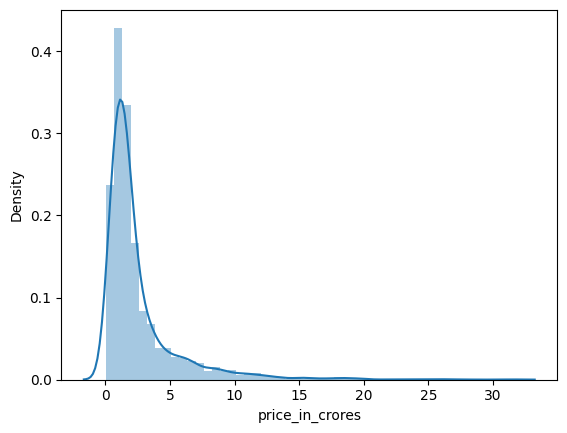

In [157]:
sns.distplot(df['price_in_crores'])

<Axes: xlabel='price_in_crores'>

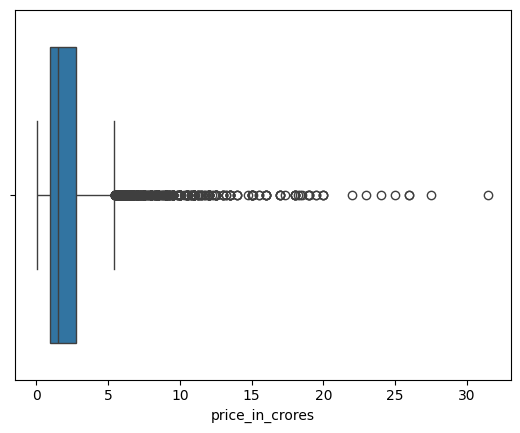

In [158]:
sns.boxplot(x=df['price_in_crores'])

In [159]:
# calculating the upper and lower fence for boxplot

Q1 = df['price_in_crores'].quantile(0.25)
Q3 = df['price_in_crores'].quantile(0.75)
IQR = Q3 -Q1
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR


In [160]:
print(Q1, Q3, IQR, lower_fence, upper_fence)

0.95 2.75 1.8 -1.7500000000000002 5.45


In [161]:
# Identifying Outliers
outliers = df[(df['price_in_crores']<lower_fence)|(df['price_in_crores']>upper_fence)]

In [162]:
outliers.shape

(425, 23)

In [163]:
#Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers["price_in_crores"].describe()

In [164]:
num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price_in_crores, dtype: float64)

In [165]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [166]:
outliers.sort_values('price_in_crores', ascending=False).head(25)

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
3715,house,Arjun Marg/ Sector- 26 Phase- 1/ Golf Course Road,sector 26,31.50,35000.0,9000.000000,NaN,7.0,9.0,3+,3.0,North-East,Moderately Old,NaN,9000.00,NaN,1,1,0,1,0,2,74
3485,house,independent,sector 43,27.50,24366.0,11286.218501,NaN,6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.22,NaN,1,0,0,1,0,0,42
3518,house,DLF City Plots,sector 26,26.00,57206.0,4544.977800,NaN,6.0,7.0,3+,2.0,North-East,New Property,NaN,4544.98,NaN,1,0,0,1,0,0,138
3476,house,independent,sector 26,26.00,82540.0,3149.987885,NaN,16.0,16.0,3+,4.0,North-West,New Property,NaN,3149.99,NaN,1,1,0,1,0,2,72
3654,house,Suncity Township,sector 54,25.00,31111.0,8035.742985,NaN,4.0,4.0,3+,2.0,North,Moderately Old,NaN,8035.74,NaN,1,1,0,1,0,1,0
3441,house,Emaar The Palm Springs,sector 54,24.00,600000.0,400.000000,NaN,5.0,5.0,2,1.0,North-East,Old Property,NaN,400.00,NaN,1,0,0,1,0,0,122
3640,house,independent,sector 26,23.00,25556.0,8999.843481,NaN,4.0,4.0,3+,2.0,South-West,Relatively New,NaN,8999.84,NaN,1,1,0,1,0,0,145
3459,house,Vipul Tatvam Villa,sector 48,22.00,26667.0,8249.896876,NaN,5.0,6.0,3,3.0,NaN,Moderately Old,NaN,8249.90,NaN,0,0,0,1,0,1,54
3434,house,DLF City Plots,sector 26,20.00,44265.0,4518.242404,NaN,16.0,20.0,3+,4.0,North-East,New Property,NaN,4518.24,NaN,1,1,0,1,0,0,153
2949,house,Luxury DLF City Floors,sector 26,20.00,48889.0,4090.899793,NaN,16.0,16.0,3+,4.0,NaN,New Property,NaN,4090.90,NaN,0,0,0,1,0,0,31


In [167]:
outliers.to_excel('outliers.xlsx', index=False)


In [168]:
## on the basis of price col we can say that there are some genuine outliers but there are some data errors as well

In [169]:
outliers['property_type'].value_counts()

property_type
house    344
flat      81
Name: count, dtype: int64

In [170]:
## Price_per_sqft

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

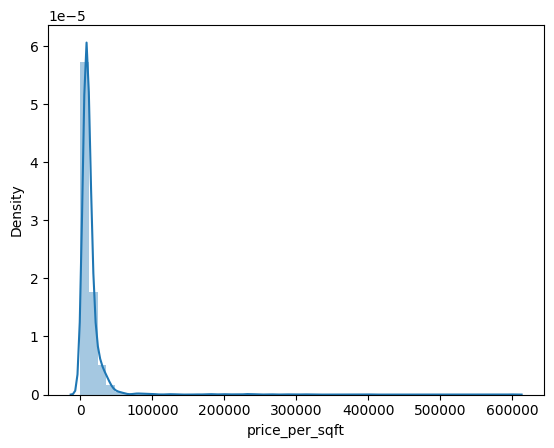

In [171]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

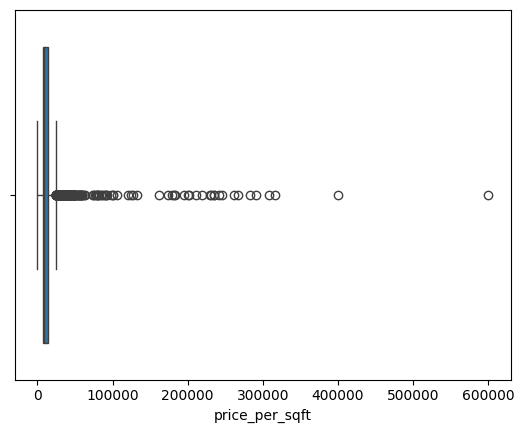

In [172]:
sns.boxplot(x=df['price_per_sqft'])

In [173]:
# calculating the upper and lower fence for boxplot

Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 -Q1
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

print(Q1, Q3, IQR, lower_fence, upper_fence)

outliers_price_per_sqft = df[(df['price_per_sqft']<lower_fence)|(df['price_per_sqft']>upper_fence)]

#Displaying the number of outliers and some statistics
num_outliers = outliers_price_per_sqft.shape[0]
outliers_price_per_sqft_stats = outliers_price_per_sqft["price_per_sqft"].describe()

6817.25 13880.5 7063.25 -3777.625 24475.375


In [174]:
num_outliers, outliers_price_per_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [175]:
outliers_price_per_sqft.to_excel('outliers_price_per_sqft.xlsx')

In [176]:
outliers_price_per_sqft['area_sqft'] = outliers_price_per_sqft['area_sqft'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\3224367132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_price_per_sqft['area_sqft'] = outliers_price_per_sqft['area_sqft'].apply(lambda x:x*9 if x<1000 else x)


In [177]:
outliers_price_per_sqft['price_per_sqft'] = round(outliers_price_per_sqft['price_in_crores']*10000000)/outliers_price_per_sqft['area_sqft']

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\1398015573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_price_per_sqft['price_per_sqft'] = round(outliers_price_per_sqft['price_in_crores']*10000000)/outliers_price_per_sqft['area_sqft']


In [178]:
outliers_price_per_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.922719
std      12403.154068
min       2723.333333
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [179]:
df.update(outliers_price_per_sqft)

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

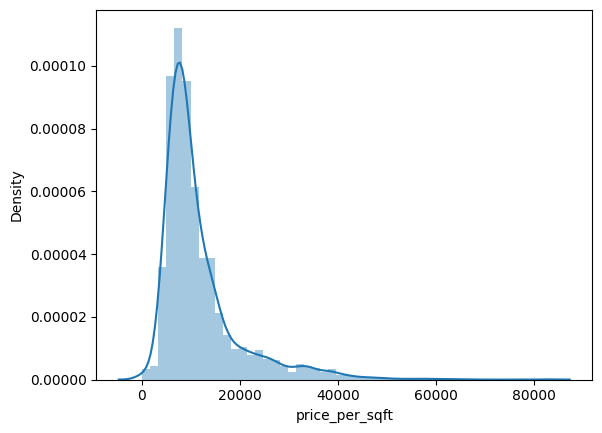

In [180]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

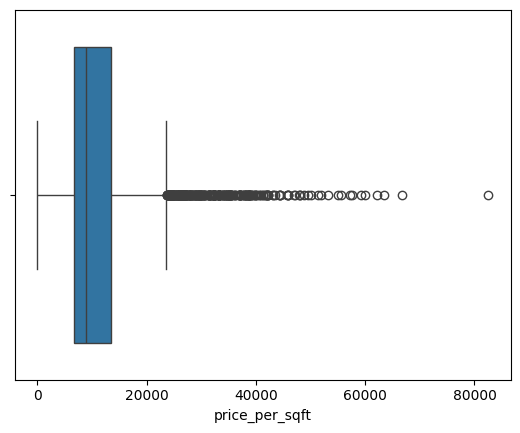

In [181]:
sns.boxplot(df['price_per_sqft'], orient='h')

In [182]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
2659,flat,unitech vistas,sector 70,9.00,57507.987220,1565.000000,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,not available,Undefined,NaN,1565.00,NaN,0,0,0,0,0,1,0
3147,house,Malibu Towne,sector 47,8.50,53125.000000,1600.000000,NaN,12.0,12.0,3+,4.0,North,New Property,NaN,1600.00,NaN,0,0,0,0,0,0,99
3304,house,Project Housing Board Colony,sector 31,8.00,63492.000000,1260.001260,NaN,2.0,1.0,0,1.0,NaN,Undefined,NaN,1260.00,NaN,0,0,0,0,0,1,0
3418,house,cloudnine cottages,sohna road,5.50,55000.000000,1000.000000,NaN,3.0,3.0,0,1.0,NaN,Moderately Old,NaN,1000.00,NaN,0,0,0,0,0,1,0
3433,house,independent,sector 26,14.75,51864.000000,2843.976554,NaN,16.0,20.0,3+,4.0,East,New Property,NaN,2843.98,NaN,1,1,0,1,0,0,153
3441,house,Emaar The Palm Springs,sector 54,24.00,66666.666667,3600.000000,NaN,5.0,5.0,2,1.0,North-East,Old Property,NaN,400.00,NaN,1,0,0,1,0,0,122
3476,house,independent,sector 26,26.00,82540.000000,3149.987885,NaN,16.0,16.0,3+,4.0,North-West,New Property,NaN,3149.99,NaN,1,1,0,1,0,2,72
3518,house,DLF City Plots,sector 26,26.00,57206.000000,4544.977800,NaN,6.0,7.0,3+,2.0,North-East,New Property,NaN,4544.98,NaN,1,0,0,1,0,0,138
3603,house,Emaar The Palm Springs,sector 54,14.00,62222.000000,2250.008036,NaN,4.0,5.0,3+,2.0,North,Old Property,NaN,2250.01,NaN,1,0,0,1,0,0,160
3667,house,Emaar MGF Marbella,sector 66,18.00,55556.000000,3239.974080,NaN,4.0,4.0,3+,3.0,East,Moderately Old,NaN,3239.97,NaN,1,0,0,1,0,2,75


In [183]:
df = df[df['price_per_sqft']<=50000]

<Axes: xlabel='price_per_sqft'>

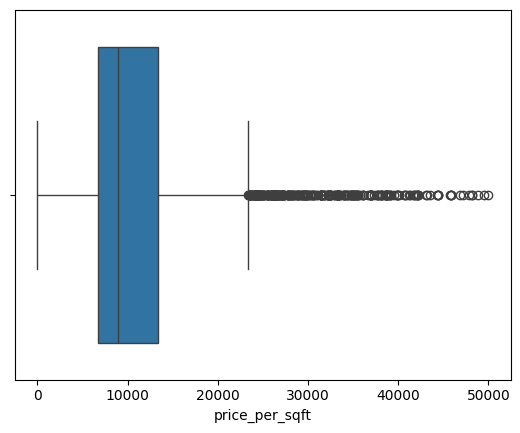

In [184]:
sns.boxplot(x=df['price_per_sqft'])

In [185]:
## Area

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\3409896276.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area_sqft'])


<Axes: xlabel='area_sqft', ylabel='Density'>

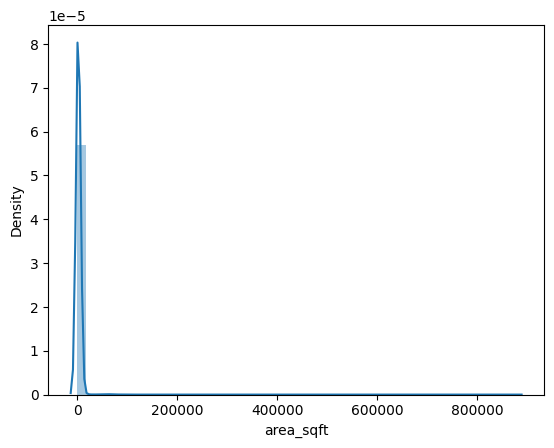

In [186]:
sns.distplot(df['area_sqft'])

<Axes: xlabel='area_sqft'>

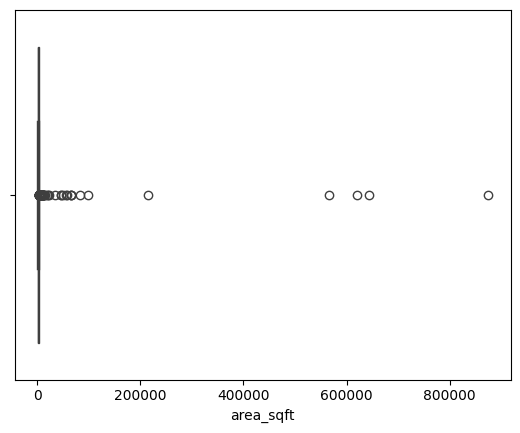

In [187]:
sns.boxplot(x=df['area_sqft'])

In [188]:
df["area_sqft"].describe()

count      3647.000000
mean       2947.728276
std       23208.195133
min         145.006344
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area_sqft, dtype: float64

In [189]:
df[df['area_sqft']>100000]

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
110,flat,signature the roselia,sector 95,0.45,7.0,642857.000000,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,1,76
1291,flat,ramsons kshitij,sector 95,0.31,5.0,620000.000000,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,0,0,0,0,1,1,65
1950,flat,signature global solera 2,sector 107,0.51,9.0,566667.000000,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,1,44
2408,flat,hcbs sports ville,sohna road,0.35,4.0,875000.000000,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,not available,Relatively New,NaN,737147.00,NaN,0,0,0,0,0,2,44
3253,house,independent,sector 50,5.00,232.0,215517.241379,NaN,6.0,5.0,3+,2.0,NaN,New Property,NaN,215517.24,NaN,1,0,0,1,0,0,0


In [190]:
df = df[df['area_sqft']<100000]

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\3409896276.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area_sqft'])


<Axes: xlabel='area_sqft', ylabel='Density'>

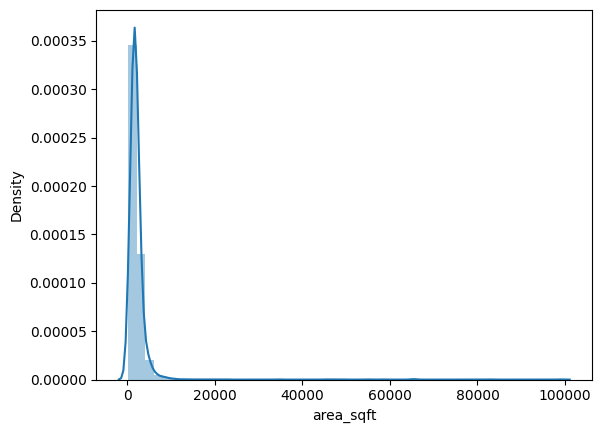

In [191]:
sns.distplot(df['area_sqft'])

<Axes: xlabel='area_sqft'>

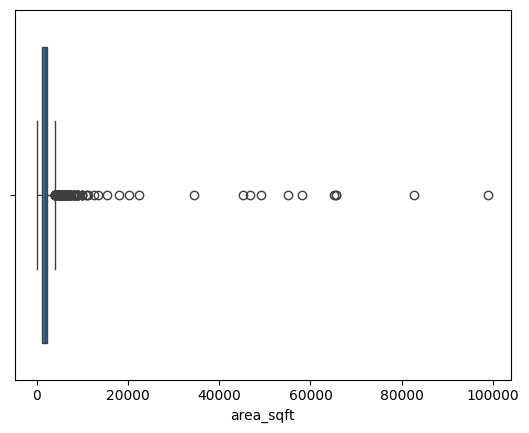

In [192]:
sns.boxplot(x=df['area_sqft'], orient='h')

In [193]:
df[df['area_sqft'] > 10000].sort_values('area_sqft', ascending=False)

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
3559,house,independent,sector 26,18.40,1859.0,98977.945132,NaN,6.0,8.0,3+,4.0,South,Relatively New,NaN,98977.95,NaN,0,1,0,1,0,0,60
3222,house,Ganpati Heights Apartment,sector 13,1.25,151.0,82781.456954,NaN,10.0,6.0,2,3.0,South-East,Old Property,NaN,82781.46,NaN,0,0,0,0,0,1,7
1293,flat,rof ananda,sector 95,0.38,58.0,65517.000000,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,1,51
2304,flat,rof ananda,sector 95,0.38,58.0,65517.000000,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,0,0,0,0,0,1,15
3294,house,DLF City Plot Phase 4,sector 28,13.00,1992.0,65261.044177,NaN,10.0,10.0,3+,1.0,NaN,Undefined,NaN,65261.04,NaN,0,0,0,0,0,1,0
79,flat,pyramid elite,sector 86,0.46,79.0,58228.000000,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,not available,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,1,15
1292,flat,rof ananda,sector 95,0.33,60.0,55000.000000,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,1,37
1415,flat,signature the serenas,sohna road,0.28,57.0,49123.000000,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,0,0,0,0,0,1,37
3471,house,independent,sector 25,7.30,1560.0,46794.871795,NaN,9.0,9.0,2,3.0,North-West,Relatively New,NaN,46794.87,NaN,0,1,0,1,0,0,109
1289,flat,ramsons kshitij,sector 95,0.24,53.0,45283.000000,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,1,33


In [194]:
df.drop(index=[3222,1293,2304,79,1292,1415,1289,1294,3056,3485,1622	], inplace=True)

In [195]:
df[df['area_sqft'] > 10000].sort_values('area_sqft', ascending=False)

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
3559,house,independent,sector 26,18.40,1859.0,98977.945132,NaN,6.0,8.0,3+,4.0,South,Relatively New,NaN,98977.95,NaN,0,1,0,1,0,0,60
3294,house,DLF City Plot Phase 4,sector 28,13.00,1992.0,65261.044177,NaN,10.0,10.0,3+,1.0,NaN,Undefined,NaN,65261.04,NaN,0,0,0,0,0,1,0
3471,house,independent,sector 25,7.30,1560.0,46794.871795,NaN,9.0,9.0,2,3.0,North-West,Relatively New,NaN,46794.87,NaN,0,1,0,1,0,0,109
3049,house,independent,sector 57,6.25,2778.0,22498.200144,NaN,9.0,9.0,3+,3.0,North-East,New Property,NaN,22498.20,NaN,0,0,0,1,0,0,61
3533,house,independent,sector 43,5.50,2716.0,20250.368189,NaN,8.0,7.0,3+,3.0,East,Moderately Old,NaN,20250.37,NaN,1,0,0,1,0,0,123
2399,flat,godrej air,sector 85,2.50,1379.0,18129.000000,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.00,0,0,1,0,1,0,44
3042,house,independent,sector 4,0.85,630.0,13492.063492,NaN,3.0,3.0,1,1.0,North,Relatively New,NaN,13492.06,NaN,0,0,0,0,0,1,0
2801,flat,godrej icon,sector 88,1.75,1384.0,12645.000000,Carpet area: 1175.11,3.0,3.0,3+,6.0,not available,New Property,NaN,NaN,1175.11,0,0,0,0,0,1,55
3420,house,independent,sohna road,5.50,5093.0,10799.136069,NaN,3.0,3.0,3+,2.0,West,Moderately Old,NaN,10799.14,NaN,1,0,0,1,0,1,49


In [196]:
df.loc[2801,'area_sqft'] = 1175.11 

In [197]:
df[df['area_sqft']<1000]

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.000000,900.000000,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,NaN,900.00,0,0,0,0,0,1,28
1,flat,apna enclave,sector 3,0.50,7692.000000,650.000000,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,NaN,650.00,0,0,0,0,0,0,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.000000,595.000000,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,not available,New Property,NaN,NaN,595.00,0,0,0,0,0,1,36
5,flat,signature global infinity mall,sector 36,0.41,6269.000000,654.000000,Built Up area: 654 (60.76 sq.m.),2.0,2.0,3,3.0,not available,Undefined,NaN,654.00,NaN,0,0,0,0,0,1,0
10,flat,signature global city 81,sector 81,0.96,9767.000000,983.000000,Carpet area: 1075 (99.87 sq.m.),2.0,2.0,2,1.0,not available,Undefined,NaN,NaN,1075.00,0,0,0,0,0,1,49
11,flat,hcbs sports ville,sohna road,0.29,5587.000000,519.000000,Carpet area: 519 (48.22 sq.m.),2.0,2.0,1,4.0,not available,Relatively New,NaN,NaN,519.00,0,0,0,0,0,1,44
16,flat,senate court,sector 62,0.90,14084.000000,639.000000,Built Up area: 639 (59.37 sq.m.),1.0,1.0,0,0.0,not available,Undefined,NaN,639.00,NaN,0,0,0,0,0,1,0
17,flat,shapoorji pallonji joyville gurugram,sector 102,1.05,11475.000000,915.000000,Carpet area: 915 (85.01 sq.m.),2.0,2.0,2,0.0,not available,Undefined,NaN,NaN,915.00,0,0,0,0,0,1,49
25,flat,the serenas,sector 36,0.42,7910.000000,531.000000,Carpet area: 531 (49.33 sq.m.),2.0,2.0,1,3.0,not available,Undefined,NaN,NaN,531.00,0,0,0,0,0,1,0
28,flat,apex builders,sector 37,0.42,5600.000000,750.000000,Carpet area: 750 (69.68 sq.m.),2.0,2.0,2,4.0,North,Relatively New,NaN,NaN,750.00,0,0,0,0,0,1,42


C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\3409896276.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area_sqft'])


<Axes: xlabel='area_sqft', ylabel='Density'>

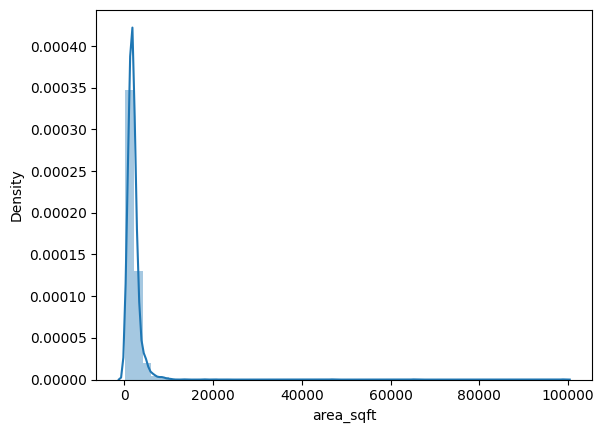

In [198]:
sns.distplot(df['area_sqft'])

<Axes: xlabel='area_sqft'>

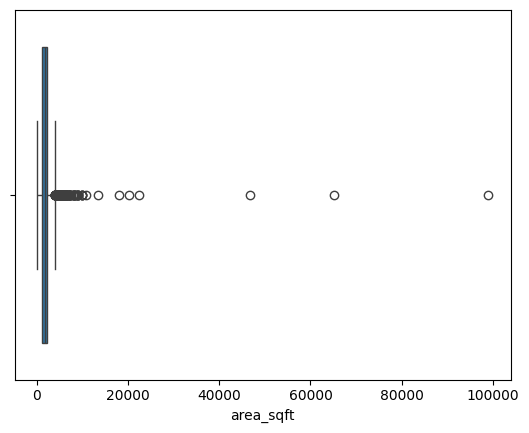

In [199]:
sns.boxplot(df['area_sqft'], orient='h')

In [200]:
df['area_sqft'].describe()

count     3631.000000
mean      2017.409356
std       2446.289064
min        145.006344
25%       1260.500000
50%       1747.000000
75%       2330.586613
max      98977.945132
Name: area_sqft, dtype: float64

## BedRoom

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

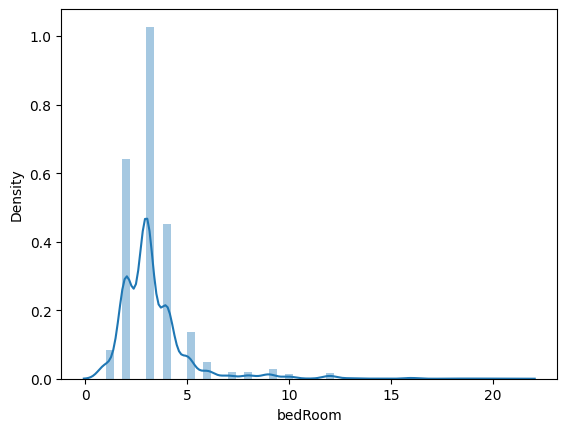

In [201]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

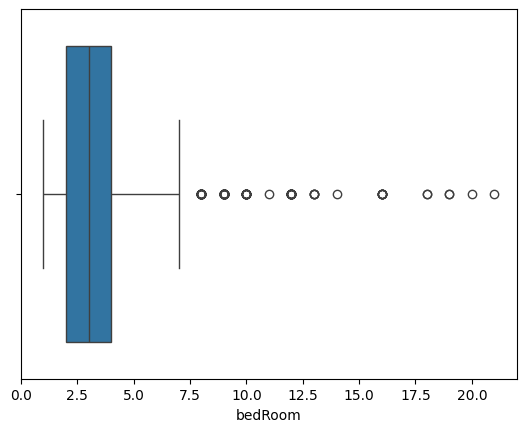

In [202]:
sns.boxplot(df['bedRoom'], orient='h')

In [203]:
df = df[df['bedRoom']<=10]

In [204]:
df.shape

(3586, 23)

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

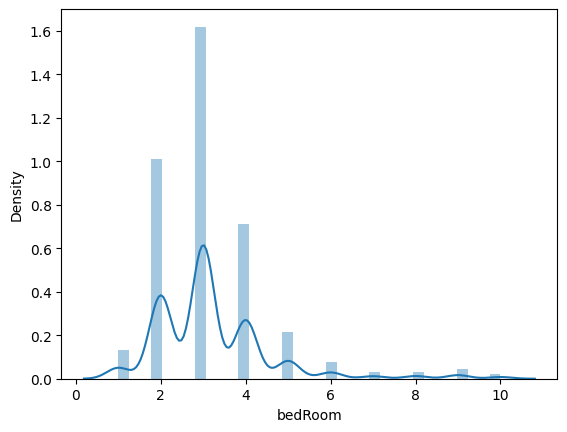

In [205]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

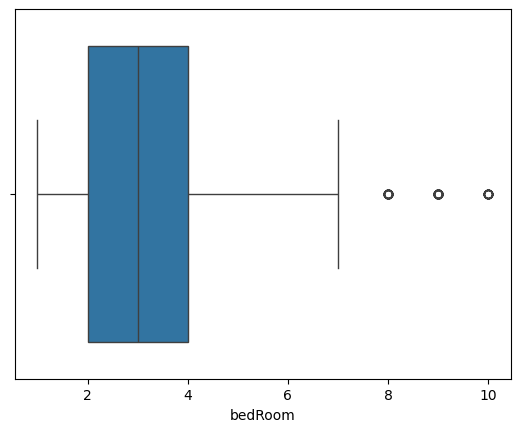

In [206]:
sns.boxplot(df['bedRoom'], orient='h')

In [207]:
df['bedRoom'].describe()

count    3586.000000
mean        3.201617
std         1.389664
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

In [208]:
## BathRoom

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

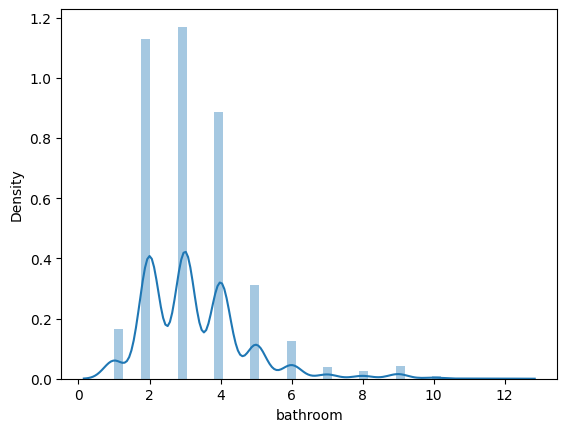

In [209]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

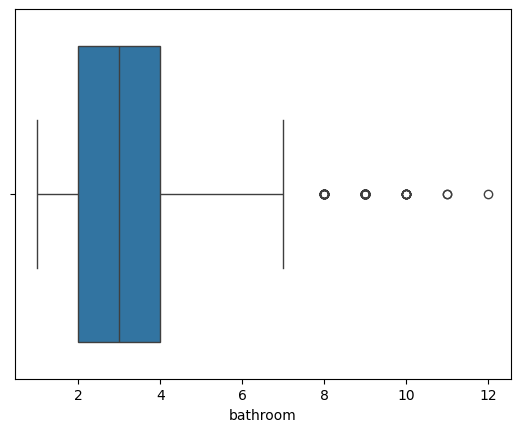

In [210]:
sns.boxplot(df['bathroom'], orient='h')

In [211]:
df[df['bathroom']>10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
3379,house,Adani Brahma Samsara,sector 60,18.02,28200.0,6390.070922,NaN,9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.07,NaN,0,0,0,1,0,0,146
3324,house,independent,sector 39,7.00,10000.0,7000.000000,NaN,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.00,NaN,0,0,0,0,0,2,38
3378,house,independent,sector 24,11.00,28898.0,3806.491799,NaN,8.0,11.0,3+,3.0,East,Old Property,NaN,3806.49,NaN,1,0,0,1,0,0,39


## Super built up area

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\583160156.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Super Built up area'])


<Axes: xlabel='Super Built up area', ylabel='Density'>

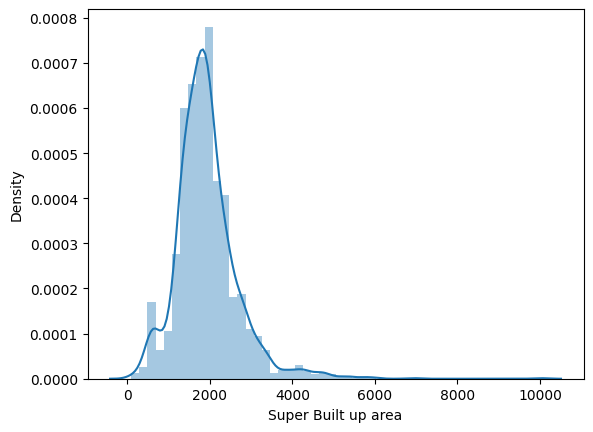

In [212]:
sns.distplot(df['Super Built up area'])

<Axes: xlabel='Super Built up area'>

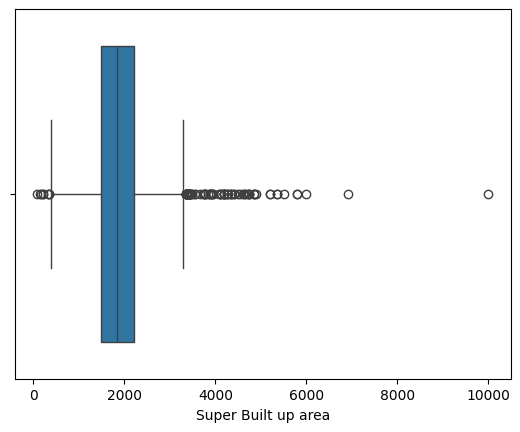

In [213]:
sns.boxplot(df['Super Built up area'], orient='h')

In [214]:
df['Super Built up area'].describe()

count     1875.000000
mean      1925.233600
std        764.173359
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: Super Built up area, dtype: float64

In [215]:
df[df['Super Built up area']>6000]

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
657,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,0,1,0,1,1,49
1528,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,0,0,0,0,0,140


## Built up area

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\2189431816.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Built Up area'])


<Axes: xlabel='Built Up area', ylabel='Density'>

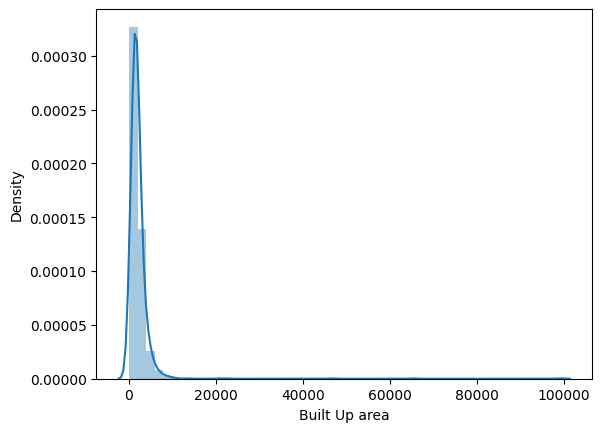

In [216]:
sns.distplot(df['Built Up area'])

<Axes: xlabel='Built Up area'>

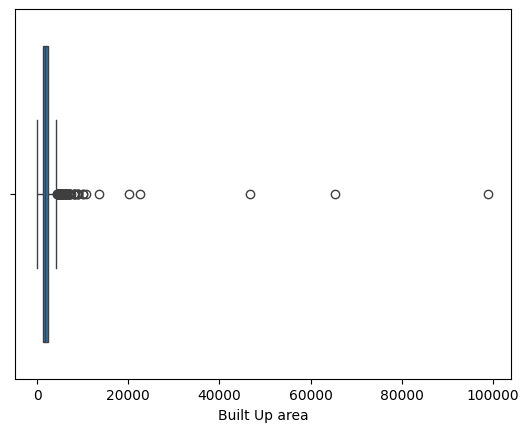

In [217]:
sns.boxplot(df['Built Up area'], orient='h')

In [218]:
df[df['Built Up area']>10000]

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
3042,house,independent,sector 4,0.85,630.0,13492.063492,NaN,3.0,3.0,1,1.0,North,Relatively New,NaN,13492.06,NaN,0,0,0,0,0,1,0
3049,house,independent,sector 57,6.25,2778.0,22498.200144,NaN,9.0,9.0,3+,3.0,North-East,New Property,NaN,22498.20,NaN,0,0,0,1,0,0,61
3294,house,DLF City Plot Phase 4,sector 28,13.00,1992.0,65261.044177,NaN,10.0,10.0,3+,1.0,NaN,Undefined,NaN,65261.04,NaN,0,0,0,0,0,1,0
3420,house,independent,sohna road,5.50,5093.0,10799.136069,NaN,3.0,3.0,3+,2.0,West,Moderately Old,NaN,10799.14,NaN,1,0,0,1,0,1,49
3471,house,independent,sector 25,7.30,1560.0,46794.871795,NaN,9.0,9.0,2,3.0,North-West,Relatively New,NaN,46794.87,NaN,0,1,0,1,0,0,109
3533,house,independent,sector 43,5.50,2716.0,20250.368189,NaN,8.0,7.0,3+,3.0,East,Moderately Old,NaN,20250.37,NaN,1,0,0,1,0,0,123
3559,house,independent,sector 26,18.40,1859.0,98977.945132,NaN,6.0,8.0,3+,4.0,South,Relatively New,NaN,98977.95,NaN,0,1,0,1,0,0,60


## Carpet area

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\31966532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Carpet area'])


<Axes: xlabel='Carpet area', ylabel='Density'>

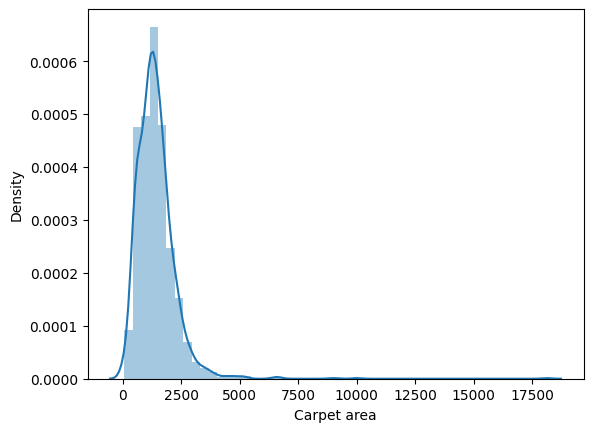

In [219]:
sns.distplot(df['Carpet area'])

<Axes: xlabel='Carpet area'>

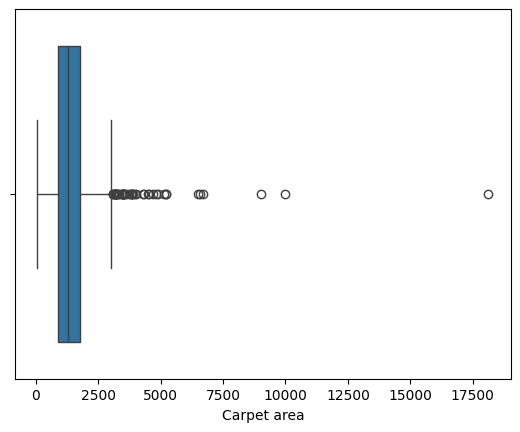

In [220]:
sns.boxplot(df['Carpet area'], orient='h')

In [221]:
df[df['Carpet area']>10000]

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
2399,flat,godrej air,sector 85,2.5,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,0,0,1,0,1,0,44


In [222]:
df.loc[2399, 'Carpet area'] = 1812

In [223]:
## luxury-score

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

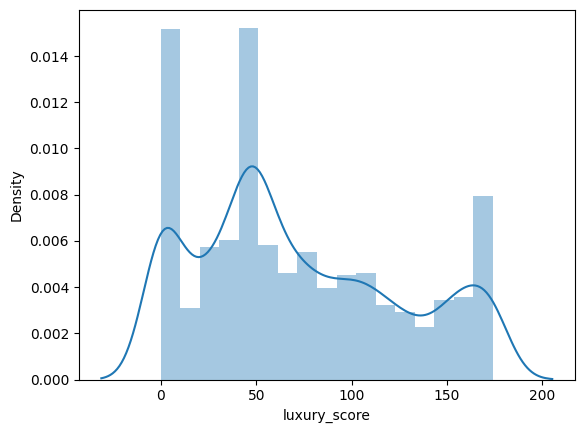

In [224]:
sns.distplot(df['luxury_score'])

<Axes: xlabel='luxury_score'>

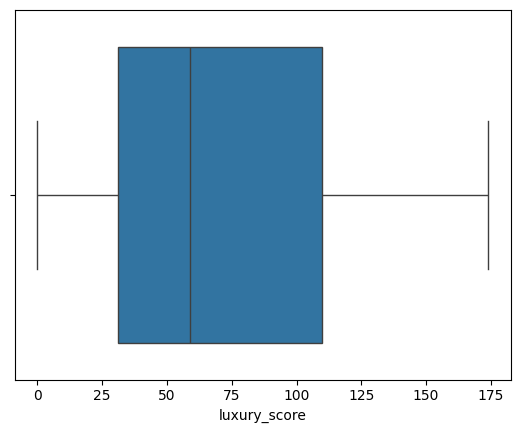

In [225]:
sns.boxplot(df['luxury_score'], orient='h')

In [226]:
df.head()

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,NaN,900.0,0,0,0,0,0,1,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,0,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,not available,New Property,NaN,NaN,595.0,0,0,0,0,0,1,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,2.0,not available,Undefined,NaN,NaN,1200.0,0,0,0,0,0,1,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,5.0,not available,Under Construction,1345.0,NaN,NaN,0,0,0,0,0,1,0


In [227]:
df['price_per_sqft'] = round(df['price_in_crores']*10000000)/df['area_sqft']

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

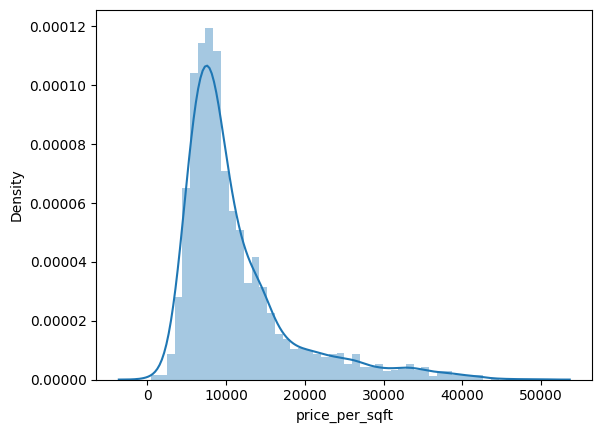

In [228]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

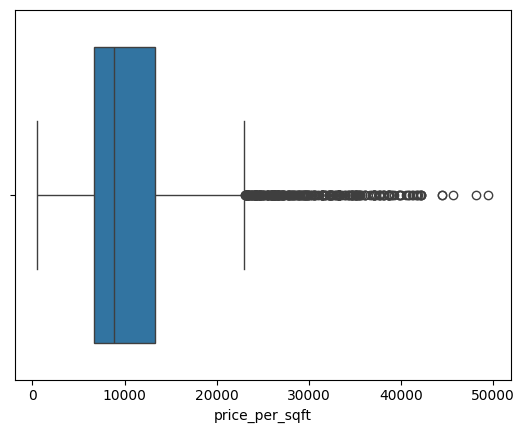

In [229]:
sns.boxplot(df['price_per_sqft'], orient='h')

In [230]:
df[df['price_per_sqft']>40000]

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
271,flat,dlf the grove,sector 54,5.70,41244.573082,1382.000000,Built Up area: 1382 (128.39 sq.m.),3.0,3.0,3,1.0,East,Undefined,NaN,1382.00,NaN,0,0,0,0,0,1,46
2959,house,Unitech Espace,sector 50,7.35,41762.000000,1759.973181,NaN,4.0,4.0,3+,3.0,South,Moderately Old,NaN,1759.97,NaN,0,0,0,1,0,0,52
3006,house,Emaar MGF Marbella,sector 66,8.80,41615.000000,2114.622131,NaN,4.0,4.0,3+,3.0,South-East,Relatively New,NaN,2114.62,NaN,0,1,0,1,0,1,107
3352,house,independent,sector 25,13.00,45710.000000,2844.016627,NaN,6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.02,NaN,1,1,0,1,0,2,0
3395,house,independent,sector 105,9.90,49500.000000,2000.000000,NaN,2.0,2.0,2,3.0,North,Undefined,NaN,2000.00,NaN,0,0,0,0,0,1,0
3412,house,independent,sector 50,12.50,40611.000000,3077.983797,NaN,6.0,5.0,3,4.0,East,Moderately Old,NaN,3077.98,NaN,1,0,0,1,0,0,23
3439,house,independent,sector 26,18.90,41833.000000,4517.964287,NaN,6.0,8.0,2,3.0,North-East,Relatively New,NaN,4517.96,NaN,1,1,0,1,0,0,120
3470,house,DLF City Plots,sector 26,19.00,42054.000000,4518.000666,NaN,6.0,6.0,3,2.0,East,Relatively New,NaN,4518.00,NaN,1,0,0,1,0,0,121
3536,house,SS Hibiscus,sector 50,12.50,40850.000000,3059.975520,NaN,4.0,4.0,3+,2.0,West,Relatively New,NaN,3059.98,NaN,1,0,0,1,0,2,160
3562,house,independent,sector 28,12.00,42194.000000,2844.006257,NaN,4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.01,NaN,0,1,0,1,0,0,60


In [231]:
x = df[df['price_per_sqft']<=20000]
print((x['area_sqft']/x['bedRoom']).quantile(0.05))

252.5


In [232]:
df = df[(df['area_sqft']/df['bedRoom'])>100]

In [233]:
small_rooms['room_score'] = small_rooms['area_sqft']/small_rooms['bedRoom']

In [234]:
small_rooms.to_excel('smallRoomswithscore.xlsx')

In [235]:
small_rooms[small_rooms['room_score']<100]

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score,room_score
3077,house,independent,sector 3,0.50,11111.000000,450.004500,NaN,5.0,3.0,3,3.0,NaN,Moderately Old,NaN,450.00,NaN,0,0,0,0,0,1,0,90.000900
3105,house,Rajendra Park Gurgaon,sector 105,0.37,10277.000000,360.027245,NaN,4.0,3.0,2,3.0,East,Relatively New,NaN,360.03,NaN,0,0,0,0,0,1,0,90.006811
3108,house,independent,sector 8,0.49,11250.000000,435.555556,NaN,6.0,3.0,2,3.0,East,Moderately Old,NaN,435.56,NaN,0,0,0,0,0,1,8,72.592593
3118,house,independent,sector 28,0.45,10000.000000,450.000000,NaN,5.0,3.0,0,1.0,NaN,Undefined,NaN,50.00,NaN,0,0,0,0,0,1,0,90.000000
3121,house,independent,sector 9,0.42,9333.000000,450.016072,NaN,5.0,3.0,2,2.0,NaN,Undefined,NaN,450.02,NaN,0,0,0,0,0,1,0,90.003214
3130,house,independent,sector 4,0.50,10482.000000,477.008205,NaN,5.0,3.0,0,1.0,NaN,Undefined,NaN,477.01,NaN,0,0,0,0,0,1,0,95.401641
3154,house,Not Applicable,sector 4,0.51,14167.000000,359.991530,NaN,4.0,4.0,3,4.0,NaN,New Property,NaN,359.99,NaN,0,0,0,0,0,1,0,89.997882
3172,house,independent,sector 17,0.32,22068.000000,145.006344,NaN,2.0,2.0,0,3.0,NaN,Undefined,NaN,145.01,NaN,0,0,0,0,0,1,0,72.503172
3178,house,independent,sector 104,0.45,12162.000000,370.004933,NaN,4.0,4.0,2,4.0,North,Moderately Old,NaN,370.00,NaN,0,0,0,0,0,0,7,92.501233
3203,house,RK Excelo,sector 12,0.60,13333.333333,450.000000,NaN,5.0,3.0,2,3.0,North,Moderately Old,NaN,50.00,NaN,0,0,0,0,0,1,0,90.000000


In [236]:
df.area_sqft.describe()

count     3566.000000
mean      2020.537165
std       2461.026390
min        225.000000
25%       1264.000000
50%       1745.000000
75%       2323.250000
max      98977.945132
Name: area_sqft, dtype: float64

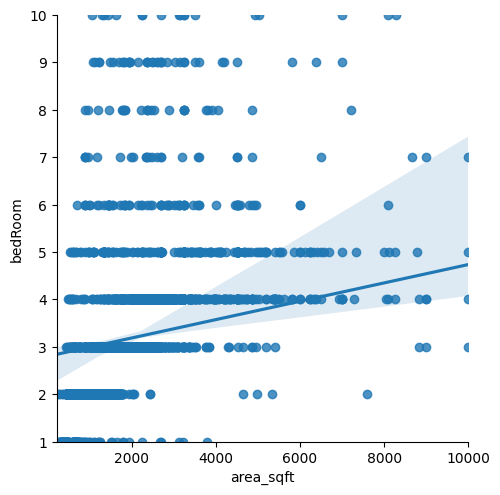

In [246]:
sns.lmplot(data=df, x='area_sqft', y='bedRoom')
plt.xlim(df['area_sqft'].min(), 10000)
plt.ylim(df['bedRoom'].min(), df['bedRoom'].max())
plt.show()

In [247]:
df['area_room_ratio'] = df['area_sqft']/df['bedRoom']

In [248]:
(df[df['area_room_ratio']<250])['bedRoom'].value_counts()

bedRoom
2.0     46
3.0     33
5.0     19
6.0     16
9.0     15
4.0     13
8.0      9
10.0     7
7.0      6
Name: count, dtype: int64

In [249]:
df = df[df['area_room_ratio']>100]

In [250]:
outliers_df = df[(df['area_room_ratio']<250)&(df['bedRoom']>3)]

In [251]:
outliers_df['bedRoom'] =round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\deepu\AppData\Local\Temp\ipykernel_51120\362852644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] =round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [252]:
df.update(outliers_df)

In [253]:
 df[(df['area_room_ratio']<250)&(df['bedRoom']>4)]

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score,area_room_ratio
3081,house,independent,manesar,1.10,6172.000000,1782.242385,NaN,8.0,8.0,0,1.0,NaN,New Property,NaN,1782.24,NaN,0,0,0,0,0,1,0,222.780298
3088,house,independent,manesar,0.80,6666.000000,1200.120012,NaN,8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.12,NaN,0,0,0,0,0,1,0,150.015002
3090,house,shivpuri,sector 7,2.80,12444.000000,2250.080360,NaN,10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.08,NaN,1,0,0,1,0,0,0,225.008036
3094,house,independent,sector 7,1.16,11717.000000,990.014509,NaN,5.0,4.0,2,1.0,North-East,Undefined,NaN,990.01,NaN,0,0,0,0,0,1,0,198.002902
3141,house,independent,sector 12,2.50,13888.000000,1800.115207,NaN,9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.12,NaN,0,0,0,0,0,1,8,200.012801
3150,house,"bhim nagar, sector 6",bhim nagar,0.85,14096.111111,603.003192,NaN,5.0,2.0,2,1.0,NaN,Old Property,NaN,67.00,NaN,0,0,0,0,0,1,29,120.600638
3202,house,independent,sector 3,1.10,10000.000000,1100.000000,NaN,5.0,4.0,2,1.0,East,Undefined,NaN,1100.00,NaN,0,0,0,0,0,1,0,220.000000
3228,house,independent,sector 12,0.65,6500.000000,1000.000000,NaN,6.0,2.0,3,1.0,NaN,Undefined,NaN,1000.00,NaN,0,0,0,0,0,1,0,166.666667
3243,house,independent,sector 105,1.10,12222.000000,900.016364,NaN,6.0,4.0,1,1.0,South-West,Undefined,NaN,900.02,NaN,0,0,0,0,0,1,0,150.002727
3300,house,independent,sector 17,0.32,5664.000000,564.971751,NaN,5.0,1.0,0,1.0,NaN,Undefined,NaN,564.97,NaN,0,0,0,0,0,1,0,112.994350


In [254]:
 df[(df['area_room_ratio']<250)&(df['bedRoom']>4)].shape

(13, 24)

In [255]:
df.shape

(3566, 24)

In [257]:
df = df[~((df['area_room_ratio']<250)&(df['bedRoom']>4))]

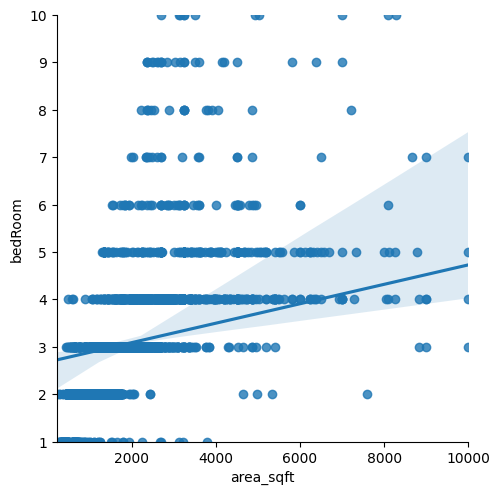

In [260]:
sns.lmplot(data=df, x='area_sqft', y='bedRoom')
plt.xlim(df['area_sqft'].min(), 10000)
plt.ylim(df['bedRoom'].min(), df['bedRoom'].max())
plt.show()

In [261]:
df.to_csv('otliers_removed_from_gurgaonProperties.csv',index=False)